# HW01: Intro to Text Data

In this assignment, we will explore how to load a text classification dataset (AG's news, originally posted [here](http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html)), how we can preprocess the data and extract useful information from a real-world dataset. First, we have to download the data; we only download a subset of the data with four classes.

In [1]:
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

--2022-02-22 17:22:08--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  28.10M  41.6MB/s    in 0.7s    

2022-02-22 17:22:10 (41.6 MB/s) - ‘train.csv’ saved [29470338/29470338]



## Inspect Data

In [57]:
import pandas as pd
df = pd.read_csv("train.csv", header=None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       120000 non-null  int64 
 1   1       120000 non-null  object
 2   2       120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


,0,1,2
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


Let's make the data more human readable by adding a header and replacing labels

In [58]:
df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 

In [59]:
df.head()

,label,title,lead
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [60]:
# TODO implement a new column text which contains the lowercased title and lead
# Solution: We convert both the title and the lead to lowercase and concatenate them, the result gets stored in the text column
df["text"] = df['title'].str.lower() + df['lead'].str.lower()
df["text"].head()

0    wall st. bears claw back into the black (reute...
1    carlyle looks toward commercial aerospace (reu...
2    oil and economy cloud stocks' outlook (reuters...
3    iraq halts oil exports from main southern pipe...
4    oil prices soar to all-time record, posing new...
Name: text, dtype: object

In [61]:
# TODO print the number of documents for each label
df.groupby('label').count()

,title,lead,text
label,,,
business,30000,30000,30000
sci/tech,30000,30000,30000
sport,30000,30000,30000
world,30000,30000,30000


In total we have 120'000 documents in our dataset, per category exactly 30'000. See table above.

## Document Length

In [62]:
# TODO create a new column with the number of words for each text
# solution: split the text into word using the split() function, i.g. using spaces

def get_words_per_doc(txt):
    # split text into words and count them.
    return len(txt.split())

# apply to our dataframe
df['num_words'] = df['text'].apply(get_words_per_doc)

In [63]:
# TODO plot the average number of words per label
df.groupby('label')['num_words'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
business,30000.0,36.681700,8.213702,8.0,31.0,37.0,42.00,133.0
sci/tech,30000.0,36.217700,12.433154,7.0,29.0,35.0,42.00,176.0
sport,30000.0,36.829767,8.883484,8.0,31.0,36.0,41.25,150.0
world,30000.0,37.971467,10.349243,10.0,32.0,38.0,43.00,144.0


label
business    AxesSubplot(0.125,0.125;0.775x0.755)
sci/tech    AxesSubplot(0.125,0.125;0.775x0.755)
sport       AxesSubplot(0.125,0.125;0.775x0.755)
world       AxesSubplot(0.125,0.125;0.775x0.755)
Name: num_words, dtype: object

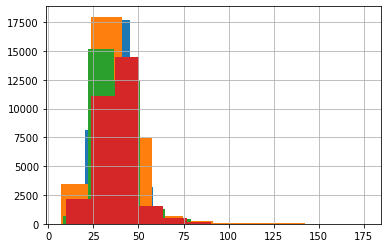

In [64]:
# Plot the histogram of the word count
df.groupby('label')['num_words'].hist()

## Word Frequency 

Let's implement a keyword search (similar to the baker-bloom economic uncertainty) and compute how often some given keywords ("play", "tax", "blackberry", "israel") appear in the different classes in our data

In [90]:
import re
keywords = ["play", "tax", "blackberry", "israel"]
for keyword in keywords:
    #TODO implement a regex pattern
    x = keyword
    pattern = re.compile(x)

    def count_keyword_frequencies(string):
        #TODO implement a function which counts how often a pattern appears in a text
        num_occurrences = len(pattern.findall(string))
        return num_occurrences

    # Now, we can print how often a keyword appears in the data
    print('Keyword: ', keyword)
    print('Count: ', df["text"].apply(count_keyword_frequencies).sum())

    # and we want to find out how often the keyword appears withhin each class
    for label in df["label"].unique():
        #TODO print how often the keyword appears in this class
        print ("label:", label,", keyword:", keyword, 'Count: ', df[df['label'] == label]["text"].apply(count_keyword_frequencies).sum())

    print('\n', "*" * 100, '\n')


Keyword:  play
Count:  8385
label: business , keyword: play Count:  386
label: sci/tech , keyword: play Count:  1929
label: sport , keyword: play Count:  5666
label: world , keyword: play Count:  404

 **************************************************************************************************** 

Keyword:  tax
Count:  1575
label: business , keyword: tax Count:  1214
label: sci/tech , keyword: tax Count:  101
label: sport , keyword: tax Count:  31
label: world , keyword: tax Count:  229

 **************************************************************************************************** 

Keyword:  blackberry
Count:  234
label: business , keyword: blackberry Count:  44
label: sci/tech , keyword: blackberry Count:  190
label: sport , keyword: blackberry Count:  0
label: world , keyword: blackberry Count:  0

 **************************************************************************************************** 

Keyword:  israel
Count:  3573
label: business , keyword: israel Count:

As a last exercise, we re-use the fuzzy keyword search implemented above and plot the total number of occurrences of "tax" (and it's variations, e.g. taxation, taxes etc.) for each class in the dataset. Hint: have a look at the [pandas bar plot with group by](https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot)

<AxesSubplot:title={'center':'Number of occurrences of the word tax'}, xlabel='label'>

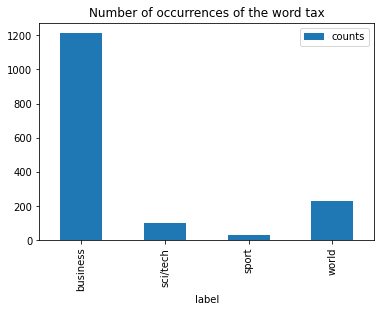

In [103]:
import matplotlib.pyplot as plt

keyword = "tax"
pattern = re.compile(keyword)

def count_keyword_frequencies(string):
    #TODO implement a function which counts how often a pattern appears in a text
    num_occurrences = len(pattern.findall(string))
    return num_occurrences

df["counts"] = df["text"].apply(count_keyword_frequencies)

#TODO create a bar plot for the wordcounts of "tax" for each class in the dataset
df.groupby('label').sum().reset_index().plot(kind='bar',x='label',y='counts', title='Number of occurrences of the word tax')

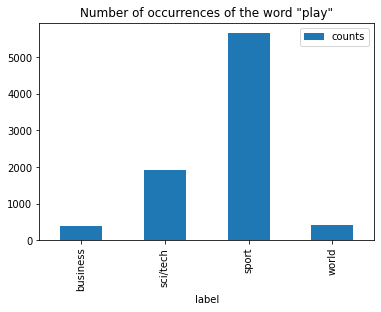

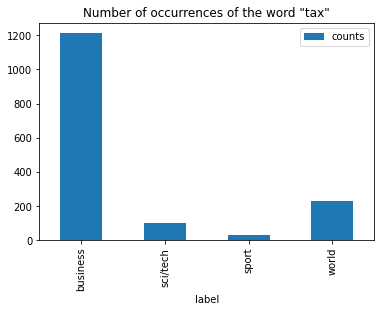

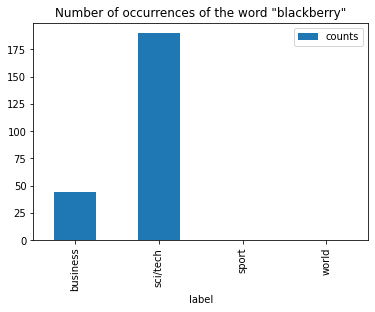

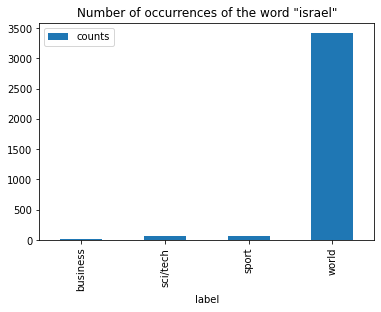

In [107]:
# Do the same for all other keywords

keywords = ["play", "tax", "blackberry", "israel"]
for keyword in keywords:
    #TODO implement a regex pattern
    pattern = re.compile(keyword)

    def count_keyword_frequencies(string):
        #TODO implement a function which counts how often a pattern appears in a text
        num_occurrences = len(pattern.findall(string))
        return num_occurrences

    df["counts"] = df["text"].apply(count_keyword_frequencies)

    #TODO create a bar plot for the wordcounts of "tax" for each class in the dataset
    df.groupby('label').sum().reset_index().plot(kind='bar',x='label',y='counts', title='Number of occurrences of the word "' + keyword + '"')